# Задача 1

Построить интерполяционный метод Адамса четвертого порядка (дать представление в двух формах).

Интерполяционный метод Адамса задается формулами
\begin{equation}
y_{j+1} = y_j + \tau\sum_{i=-1}^{k}A_i f(t_{j-i}. y_{j-i}),\quad A_i = \dfrac{(-1)^{i+1}}{(i+1)! (k-i)!}\int\limits_0^1 \dfrac{(\alpha-1)\alpha(\alpha+1)\ldots(\alpha+k)}{\alpha+i}d\alpha.
\end{equation}

Построим метод по этой формуле. Для этого задаем $k=2$ и вычисляем коэффициенты $A_i$:
$$A_{-1} = \dfrac{1}{3!}\int\limits_0^1 \dfrac{(\alpha-1)\alpha(\alpha+1)(\alpha+2)}{\alpha-1}d\alpha=\dfrac16\int\limits_0^1 \alpha^3 + 3\alpha^2 + 2\alpha d\alpha = \dfrac{9}{24}.$$
$$A_{0} = \dfrac{-1}{2!}\int\limits_0^1 \dfrac{(\alpha-1)\alpha(\alpha+1)(\alpha+2)}{\alpha}d\alpha=-\dfrac12\int\limits_0^1 \alpha^3 + 2\alpha^2 - \alpha - 2 d\alpha = \dfrac{19}{24}.$$
$$A_{1} = \dfrac{1}{2!}\int\limits_0^1 \dfrac{(\alpha-1)\alpha(\alpha+1)(\alpha+2)}{\alpha+1}d\alpha=\dfrac12\int\limits_0^1 \alpha^3 + \alpha^2 - 2\alpha d\alpha = -\dfrac{5}{24}.$$
$$A_{2} = \dfrac{-1}{3!}\int\limits_0^1 \dfrac{(\alpha-1)\alpha(\alpha+1)(\alpha+2)}{\alpha+2}d\alpha=-\dfrac16\int\limits_0^1 \alpha^3 - \alpha d\alpha = \dfrac{1}{24}.$$

Сравним полученные результаты с программным алгоритмом:

In [21]:
import scipy.integrate as integrate
import scipy.special as special
import math

def f(x, i, k):
    result = 1 / (x + i)
    for j in range(-1, k+1):
        result *= (x + j)
    return result
        
k = 2
A = []
for i in range(-1, k+1):
    A.append((-1)**(i+1) / (math.factorial(i+1) * math.factorial(k-i)) * integrate.quad(lambda x: f(x, i, k), 0, 1)[0])
print(*A)

0.375 0.7916666666666666 -0.20833333333333334 0.041666666666666664


Полученные программно значения совпадают со значениями, вычисленными аналитически. Тогда формула интерполяционного метода Адамса примет вид
$$y_{j+1} = y_j + \dfrac{\tau}{24}\left(9 f_{j+1} + 19 f_j - 5f_{j-1} + f_{j-2}\right).$$

Построим представление через конечные разности по формулам
\begin{equation}
y_{j+1} = y_j + \tau \sum_{i=0}^{k+1}C_i \Delta ^i f_{j+1-i},\ C_i =\dfrac{1}{i!}\int\limits_{-1}^0\alpha(\alpha+1)\ldots (\alpha+i-1)d\alpha.
\end{equation}
Для этого задаем $k=2$ и снова вычисляем коэффициенты $C_i$:
$$C_0 =\dfrac{1}{0!} = 1,\ C_1 = \dfrac{1}{1!} \int\limits_{-1}^0 \alpha d\alpha = - \dfrac12,\ C_2 = \dfrac{1}{2!} \int\limits_{-1}^0 \alpha(\alpha+1) d\alpha = -\dfrac{1}{12}, C_3 = \dfrac{1}{3!} \int\limits_{-1}^0 \alpha(\alpha+1)(\alpha+2) d\alpha = -\dfrac{1}{24}.$$

Сравним полученные значения с программным алгоритмом:

In [25]:
def g(x, i):
    result = 1
    for j in range(0, i):
        result *= (x + j)
    return result

C = []
for i in range(0, k+2):
    C.append(1/math.factorial(i) * integrate.quad(lambda x: g(x, i), -1, 0)[0])
print(*C)

1.0 -0.5 -0.08333333333333334 -0.041666666666666664


Полученные программно значения совпадают со значениями, вычисленными аналитически. Тогда формула интерполяционного метода Адамса через конечные разности примет вид
$$y_{j+1} = y_j + \tau \left(f_{j+1} - \dfrac12 \Delta f_{j} - \dfrac{1}{12} \Delta^2 f_{j-1} - \dfrac{1}{24}\Delta^3 f_{j-2}\right).$$

# Задача 2

Определить порядок точности метода 
$$
\begin{cases}
y_{j+1} = y_j + \dfrac\tau 6 (k_1 + 4k_2 + k_3),\\
k_1 = f(t_j, y_j),\\
k_2 = f\left(t_j + \dfrac \tau 2, y_j + \dfrac\tau 2 k_1\right),\\
k_3 = f(t_j + \tau, y_j - \tau(k_1 - 2k_2)).
\end{cases}
$$


Этот метод относится к методам типа Рунге-Кутта. Для определения его порядка точности можно воспользоваться таблицей Батчера и соответствующими ей соотношениями. Сам метод в виде таблицы можно представить следующим образом
$$\begin{matrix} 
c_1 & | & a_{11} & a_{12} & a_{13}\\
c_2 & | & a_{21} & a_{22} & a_{23}\\
c_3 & | & a_{31} & a_{32} & a_{33}\\ \hline
 & | & b_1 & b_2 & b_3
\end{matrix} = \begin{matrix} 
0 & | & 0 & 0 & 0\\
\frac13 & | & \frac13 & 0 & 0\\
\frac23 & |& 0 & \frac13 & 0\\ \hline
 & | & \frac14 & 0 & \frac34
\end{matrix}$$
Для каждого порядка точности строятся соотношения:
$$\sum_j a_{ij} = c_i,$$
- для 1-ого порядка:
$$\sum_j b_j = 1,$$
- для 2-ого порядка
$$\sum_j b_jc_j = \dfrac12$$
- для 3-его порядка
$$\sum_j b_jc_j^2 = \dfrac13, \ \sum_{j,k} b_j a_{jk} c_k = \dfrac16,$$
- для 4-ого порядка
$$\sum_j b_jc_j^3 = \dfrac14, \ \sum_{j,k} b_jc_j a_{jk} c_k = \dfrac18,\  \sum_{j,k} b_j a_{jk} c_k^2 = \dfrac{1}{12},\ \sum_{j,k, l} b_j a_{jk} a_{kl} c_l = \dfrac{1}{24}.$$
Необходимо в соответствии с таблицей подставить значения и проверить, выполняются ли равенства. Для подсчетов реализуем компьютерный метод, который будет вычислять значение каждой из сумм и сравнивать их с нужными значениями из правой части равенств. Вообще говоря, известно, что эта формула задает аналог метода Симпсона и является методом третьего порядка точности.

In [106]:
c = [0, 1/2, 1]
b = [1/6, 4/6, 1/6]
a = [[0, 0, 0], 
     [1/2, 0, 0], 
     [-1, 2, 0]]
n = 3

# Проверка на 1-ый порядок
res = [0 for _ in range(n)]
for j in range(n):
    res[j] = sum(a[j])
if res == c:
    res = b[0]
    for j in range(1, n):
        res += b[j]
    if res - 1 < 1e-10:
        print('Метод имеет порядок не ниже первого')
else:
    print('Метод некорректен')
    
# Проверка на 2-ой порядок
res = 0
for j in range(n):
    res += c[j]*b[j]
if res == 1/2:
    print('Метод имеет порядок не ниже второго')
else:
    print('Метод имеет первый порядок')

# Проверка на 3-ий порядок
res = 0
for j in range(n):
    res += b[j]*c[j]**2
if res == 1/3:
    res = 0
    for j in range(n):
        for k in range(n):
            res += b[j]*a[j][k]*c[k]
    if res == 1/6:
        print('Метод имеет порядок не ниже третьего')
    else:
        print('Метод имеет второй порядок не выполнено условие 2')
        print('Сумма равна', res, 'а должна быть', 1/6)
else:
    print('Метод имеет второй порядок не выполнено условие 1')
    print('Сумма равна', res, 'а должна быть', 1/3)

# Проверка на 4-ый порядок
res = 0
for j in range(n):
    res += b[j]*c[j]**3
if res == 1/4:
    res = 0
    for j in range(n):
        for k in range(n):
            res += b[j]*c[j]*a[j][k]*c[k]
    if res == 1/8:
        res = 0
        for j in range(n):
            for k in range(n):
                res += b[j]*a[j][k]*c[k]**2
        if res == 1/12:
            res = 0
            for j in range(n):
                for k in range(n):
                    for l in range(n):
                        res += b[j]*a[j][k]*a[k][l]*c[l]
            if res == 1/24:
                print('Метод имеет порядок не ниже четвертого')
            else:
                print('Метод имеет третий порядок не выполнено условие 4')
                print('Сумма равна', res, 'а должна быть', 1/24)
        else:
            print('Метод имеет третий порядок не выполнено условие 3')
            print('Сумма равна', res, 'а должна быть', 1/12)
    else:
        print('Метод имеет третий порядок не выполнено условие 2')
        print('Сумма равна', res, 'а должна быть', 1/8)
else:
    print('Метод имеет третий порядок, не выполнено условие 1')
    print('Сумма равна', res, 'а должна быть', 1/4)

Метод имеет порядок не ниже первого
Метод имеет порядок не ниже второго
Метод имеет порядок не ниже третьего
Метод имеет третий порядок не выполнено условие 2
Сумма равна 0.16666666666666666 а должна быть 0.125


Метод имеет третий порядок точности, что и требовалось доказать.

# Задача 3

Найти интервал устойчивости метода
$$
\begin{cases}
y_{j+1} = y_j + \dfrac\tau 6 (k_1 + 4k_2 + k_3),\\
k_1 = f(t_j, y_j),\\
k_2 = f\left(t_j + \dfrac \tau 2, y_j + \dfrac\tau 2 k_1\right),\\
k_3 = f(t_j + \tau, y_j - \tau(k_1 - 2k_2)).
\end{cases}
$$

Из модельного уравнения $$u'(t) = \lambda u(t),\ \operatorname{Re}\lambda < 0,\ \lambda \in \mathbb C$$
имеем $$f(t_j, y(t_j)) = \lambda y(t_j).$$
Подставим это во все уравнения метода, тогда, применяя замену $\lambda \tau = z$, получим
$$
\begin{cases}
y_{j+1} = y_j + \dfrac\tau 6 (k_1 + 4k_2 + k_3),\\
k_1 = \lambda y_j,\\
k_2 = \lambda \left(y_j + \dfrac\tau 2 \lambda y_j\right) = \lambda y_j \left(1+\dfrac z2\right),\\
k_3 = \lambda \left(y_j - \tau (\lambda y_j -2 \lambda y_j\left(1+\dfrac z2\right)\right) = \lambda y_j \left(1 + z + z^2\right).
\end{cases}
$$
Отсюда получим
$$y_{j+1} = y_j \left(1 + z + \dfrac z2 + \dfrac{z^3}{6} \right).$$
Для торго, чтобы метод был устойчив, необходимо выполнение условия $$\left|1 + z + \dfrac{z^2}{2} + \dfrac{z^3}{6}\right|<1.$$
Раскрываем модуль и получаем систему неравенств
$$
\begin{cases}
1 + z + \dfrac{z^2}{2} + \dfrac{z^3}{6} < 1,\\
1 + z + \dfrac{z^2}{2} + \dfrac{z^3}{6} > -1.
\end{cases}
$$
Найдем решение первого неравенства:
$$1 + z + \dfrac{z^2}{2} + \dfrac{z^3}{6} < 1 \Rightarrow z(z^2 + 3z + 6) < 0.$$
Левая часть неравенства обращается в ноль при $z=0$, а множитель $(z^2 + 3z + 6)>0$. Тогда для выполнения неравенства необходимо, чтобы $$z<0.$$
Найдем решение второго неравенства:
$$1 + z + \dfrac{z^2}{2} + \dfrac{z^3}{6} > -1 \Rightarrow z^3 + 3z^2 +6z + 12 > 0.$$
Найдем корни уравнения $z^3 + 3z^2 +6z + 12 = 0$. Для этого преобразуем уравнение следующим образом
$$z^3 + 3z^2 +6z + 12 = (z+1)^3 + 3(z+1) + 8 = 0.$$
Заменим $x = z+1$ и получим $$x^3 + 3x + 8 = 0.$$
Решение данного уравнения будем искать в виде $$x_0 = x + \dfrac{\alpha} {x},$$ где $\alpha$ --- это определяемый параметр.
Подставим это решение в уравнение 
$$x^3 + +3x\alpha + 3\dfrac \alpha x + \dfrac{\alpha^3}{x^3} + 3 \left(x + \dfrac \alpha x\right) + 8 =0.$$
Отсюда
$$x^3 + \dfrac{\alpha^3}{x^3} + 3\alpha\left(x + \dfrac \alpha x\right) 3 \left(x + \dfrac \alpha x\right)+ 8 = 0.$$
Тогда определим $\alpha = -1$ и получим уравнение 
$$x^3 - \dfrac1 {x^3} + 8 = 0.$$
Домножим на $x^3$ и получим
$$x^6 + 8 x^3 - 1 = 0.$$
Заменим $t = x^3$, тогда получим квадратное уравнение $$t^3 + 8t - 1 = 0.$$
Его корни будут равны $$t_{1,2} = \dfrac{-8 \pm 2\sqrt {17}}{2} = -4 \pm \sqrt{17}.$$
Сделаем обратную замену и получим $$x^3 = -4 \pm \sqrt{17}.$$
Данное уравнение имеет 2 комплексных решения и 1 действительное. Поскольку нас интересуют только действительные решения, то $$x = \sqrt[3]{-4 +\sqrt{17}}.$$
Подставим это значение в тот вид, в котором мы искали решение, и получим
$$x_0 = \sqrt[3]{-4 +\sqrt{17}} - \dfrac{1}{\sqrt[3]{-4 +\sqrt{17}}} = z+1.$$
Таким образом, решение уравнения $$z = \sqrt[3]{-4 +\sqrt{17}} - \dfrac{1}{\sqrt[3]{-4 +\sqrt{17}}} - 1.$$
А значит исходное неравенство верно при $$z > \sqrt[3]{-4 +\sqrt{17}} - \dfrac{1}{\sqrt[3]{-4 +\sqrt{17}}} - 1.$$
В итоге для устойчивости метода необходимо, чтобы $$z \in \left[\sqrt[3]{-4 +\sqrt{17}} - \dfrac{1}{\sqrt[3]{-4 +\sqrt{17}}} - 1, 0\right).$$

# Задача 4

С заданной точностью $\varepsilon = 10^{-4}$ найти решение задачи Коши с помощью:

1. неявного метода трапеций;

2. явного метода Рунге-Кутта четвертого порядка;

3. экстраполяционного метода Адамса четвертого порядка
$$\begin{cases} 
u' = \dfrac15 \begin{pmatrix} -104 & -198 \\ -198 & -401 \end{pmatrix} u,\\
u(0) = \begin{pmatrix} 5 \\ 10 \end{pmatrix},
\end{cases}\ t \in [0,5].$$

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def f(u, t):
    dudt = 1/5 * np.dot(np.array([[-104, -198], [-198, -401]]), u)
    return dudt

u0 = [5, 10]
t_start = 0
t_end = 5

Аналитическое решение $$u_1(t) = 5e^{-100 t},\ u_2(t) = 10e^{-100 t}.$$

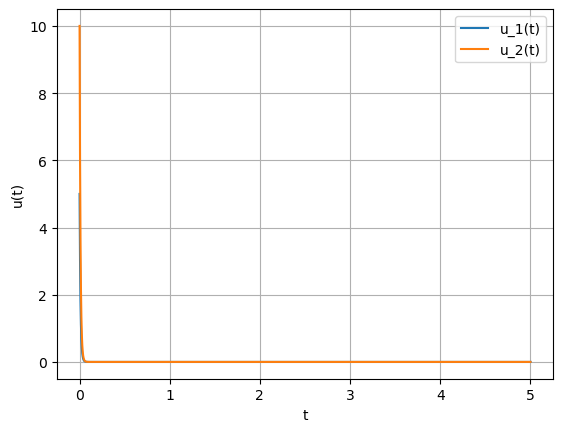

In [165]:
def solution(nodes):
    t = np.array(nodes)
    return np.array([5*np.e**(-100*t), 10*np.e**(-100*t)]).T

t = np.linspace(t_start, t_end, 1000)
plt.plot(t, solution(t)[:, 0], label='u_1(t)')
plt.plot(t, solution(t)[:, 1], label='u_2(t)')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.show()

Неявный метод трапеций:
$$y_{j+1} = y_j + \dfrac h2 (f_j + f_{j+1}).$$
По МПИ
$$y^{k+1}_{j+1} = y_j + \dfrac h2 (f_j + f(t_j + h, y_{j+1}^k)),\ y^0_{j+1} = y_j.$$

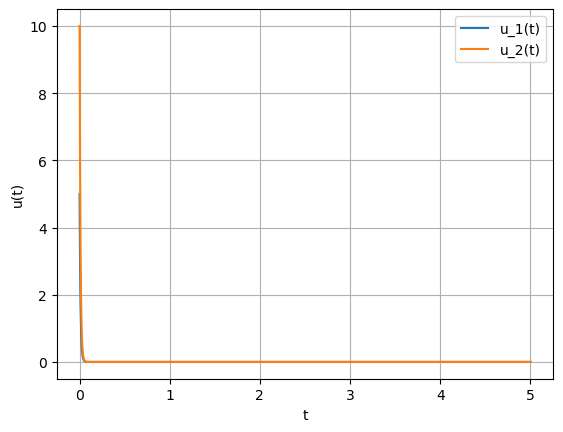

In [162]:
def trapezoids(f, y0, t_start, t_end, epsilon):
    y = [np.array(y0)]
    t = t_start
    nodes = [t_start]
    j = 0
    h1 = epsilon**(1/2)
    k = 1.005
    while True:
         
        while True:
            y_h1_k = y[j]
            y_h1 = y[j]
            while True:
                y_h1 = y[j] + h1/2 * (f(y[j], t) + f(y_h1_k, t+h1))
                if np.max(np.absolute(y_h1 - y_h1_k)) < epsilon * 1e-2:
                    break
                y_h1_k = y_h1
            
            h2 = h1/2
            y_h2_k = y[j]
            y_h2 = y[j]
            while True:
                y_h2 = y[j] + h2/2 * (f(y[j], t) + f(y_h2_k, t+h2))
                if np.max(np.absolute(y_h2 - y_h2_k)) < epsilon * 1e-2:
                    break
                y_h2_k = y_h2
            
            if np.max(y_h2 - y_h1) / (1 - (h2 / h1)**2) < epsilon:
                y.append(y_h1)
                break 
            else:
                h1 /= 2
                
        j += 1
        if t + h1 > t_end: 
            nodes.append(t_end) 
            break
        else:
            t += h1 
            nodes.append(t)
            h1 *= k
    
    return np.stack(y, axis=0), nodes

# вычисление решения
approx_solution, nodes = trapezoids(f, u0, t_start, t_end, 1e-4)

# вычисление отклонения аналитического решения от приближенного
print('Отклонение от аналитического решения:', np.max(np.absolute(approx_solution - solution(nodes))))

#график
plt.plot(nodes, approx_solution[:, 0], label='u_1(t)')
plt.plot(nodes, approx_solution[:, 1], label='u_2(t)')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.show()

$$\begin{cases}
			y_{j+1} = y_j + \dfrac16 (\varphi_0 + 2\varphi_1 + 2\varphi_2 + \varphi_3),\\
			\varphi_0 = hf_j,\\
			\varphi_1 = hf\left(x_j + \dfrac12h, y_j + \dfrac12\varphi_0\right),\\
			\varphi_2 = hf\left(x_j + \dfrac 12h, y_j + \dfrac12 \varphi_1\right),\\
			\varphi_3 = hf(x_j + h, y_j + \varphi_2).
		\end{cases}$$ 

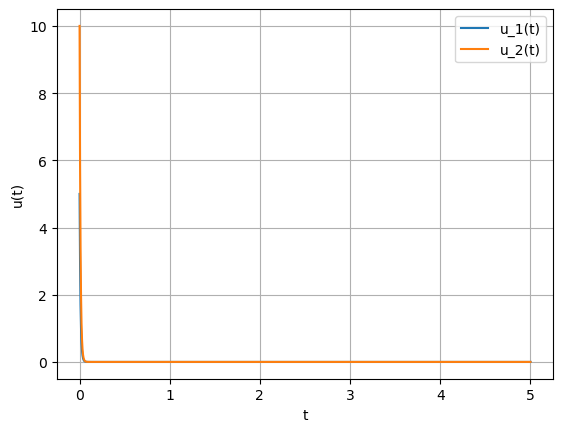

In [163]:
def runge_kutta(f, y0, t_start, t_end, epsilon):
    y = [np.array(y0)]
    t = t_start
    nodes = [t_start]
    j = 0
    h1 = epsilon**(1/2)
    k = 1.005
    while True:
        
        while True:
            phi_0_h1 = h1 * f(y[j], t)
            phi_1_h1 = h1 * f(y[j] + 1/2 * phi_0_h1, t + 1/2 * h1)
            phi_2_h1 = h1 * f(y[j] + 1/2 * phi_1_h1, t + 1/2 * h1)
            phi_3_h1 = h1 * f(y[j] + phi_1_h1, t + h1)
            y_h1 = y[j] + 1/6 * (phi_0_h1 + 2*phi_1_h1 + 2*phi_2_h1 + phi_3_h1)
            
            h2 = h1 / 2
            phi_0_h2 = h2 * f(y[j], t)
            phi_1_h2 = h2 * f(y[j] + 1/2 * phi_0_h2, t + 1/2 * h2)
            phi_2_h2 = h2 * f(y[j] + 1/2 * phi_1_h2, t + 1/2 * h2)
            phi_3_h2 = h2 * f(y[j] + phi_1_h2, t + h2)
            y_h2 = y[j] + 1/6 * (phi_0_h2 + 2*phi_1_h2 + 2*phi_2_h2 + phi_3_h2)
            
            if np.max(y_h2 - y_h1) / (1 - (h2 / h1)**3) < epsilon:
                y.append(y_h1)
                break 
            else:
                h1 /= 2
                
        j += 1
        if t + h1 > t_end: 
            nodes.append(t_end) 
            break
        else:
            t += h1 
            nodes.append(t)
            h1 *= k
    
    return np.stack(y, axis=0), nodes

# вычисление решения
approx_solution_2, nodes_2 = runge_kutta(f, u0, t_start, t_end, 1e-4)

# вычисление отклонения аналитического решения от приближенного
np.max(np.absolute(approx_solution_2 - solution(nodes_2)))

#график
plt.plot(nodes_2, approx_solution_2[:, 0], label='u_1(t)')
plt.plot(nodes_2, approx_solution_2[:, 1], label='u_2(t)')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.show()

$$y_{j+1} = y_j + \dfrac{h}{24} (53 f_j - 59 f_{j-1} +37f_{j-2} - 9f_{j-3}).$$
Значения $y_1, y_2, y_3$ возьмем из предыдущего метода.

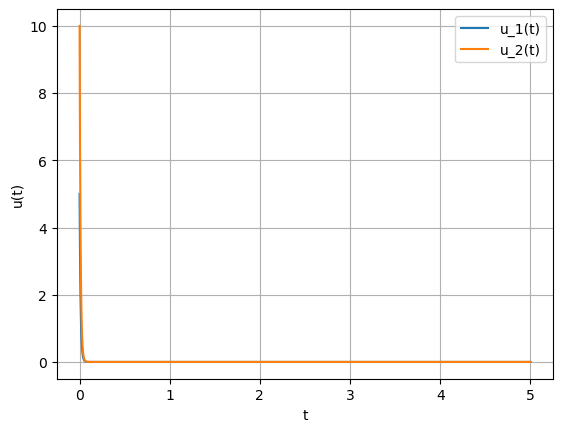

In [164]:
def adams(f, y0, t_start, t_end, epsilon):
    y = y0.tolist()
    t = t_start[-1]
    nodes = t_start
    j = 3
    h1 = epsilon**(1/2)
    k = 1.005
    while True:
        
        while True:
            y_h1 = y[j] + h1 / 24 * (53 * f(y[j], nodes[j]) - 59 * f(y[j-1], nodes[j-1]) + 37 * f(y[j-2], nodes[j-2]) - 9 * f(y[j-3], nodes[j-3]))
            
            h2 = h1 / 2
            
            y_h2 = y[j] + h2 / 24 * (53 * f(y[j], nodes[j]) - 59 * f(y[j-1], nodes[j-1]) + 37 * f(y[j-2], nodes[j-2]) - 9 * f(y[j-3], nodes[j-3]))

            if np.max(y_h2 - y_h1) / (1 - (h2 / h1)**4) < epsilon:
                y.append(y_h1)
                break 
            else:
                h1 /= 2
                
        j += 1
        if t + h1 > t_end: 
            nodes.append(t_end) 
            break
        else:
            t += h1 
            nodes.append(t)
            h1 *= k
    
    return np.stack(y, axis=0), nodes

#вычисление решения
approx_solution_3, nodes_3 = adams(f, approx_solution_2[:4], nodes_2[:4], t_end, 1e-4)

#график
plt.plot(nodes_3, approx_solution_3[:, 0], label='u_1(t)')
plt.plot(nodes_3, approx_solution_3[:, 1], label='u_2(t)')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.show()